In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tsvd import *
import scipy.io as sio

#
# c = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(data,axes=1),axis=1),axes=1)
# img = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(c,axes=2),axis=2),axes=2)
#
# # plt.imshow(np.abs(img[10,:,:]),cmap='gray')
# # plt.show()

def im2kspace(images):
    ### images are nt x nx x ny
    
    c = np.fft.fftshift(np.fft.fft(np.fft.fftshift(images, axes=1), axis=1), axes=1) * np.sqrt(n2)
    kdata = np.fft.fftshift(np.fft.fft(np.fft.fftshift(c, axes=2), axis=2), axes=2) * np.sqrt(n3)
    return kdata

def kspace2im(kdata):
    ### kdata is nt x nx x ny

    # data_rec = tensor.array() + 1j * C.array()
    # data_rec = np.transpose(data_rec, (1, 0, 2))
    n1, n2, n3 = kdata.shape
    c = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(kdata, axes=1), axis=1), axes=1) * 1 / np.sqrt(n2)
    im_rec = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(c, axes=2), axis=2), axes=2) * 1 / np.sqrt(n3)
#     c = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(kdata, axes=1), axis=1), axes=1)
#     im_rec = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(c, axes=2), axis=2), axes=2)
    return np.abs(im_rec)

def compute_stats(Rhat,Chat,R,C,orig_im,kdata_orig):
    _,n2,_ = R.shape()
    slice_err = []
    for i in range(0,n2):
#         slice_err.append(tfrobnorm_array(Rhat.array()[:,i,:] - R.array()[:,i,:]) / tfrobnorm_array(R.array()[:,i,:]))
        slice_err.append(tfrobnorm_array(Chat.array()[:,i,:] - C.array()[:,i,:]) / tfrobnorm_array(C.array()[:,i,:]))
    
    kdata_rec = Rhat.array() + 1j * Chat.array()
    kdata_rec = np.transpose(kdata_rec,(1,0,2))
    im_rec = kspace2im(kdata_rec)
    rec_im = np.abs(im_rec)

    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.imshow(orig_im[vis_idx,:,:],cmap='gray')
    plt.title('Original magnitude image')

    plt.subplot(2,2,2)
    test = np.log(np.abs(kdata_orig[vis_idx,:,:]) + 1e-13)
    plt.imshow(test,cmap='gray')
    plt.title('Original Magnitude kspace')

    plt.subplot(2,2,3)
    plt.imshow(rec_im[vis_idx,:,:],cmap='gray')
    plt.title('Reconstructed')
    plt.subplot(2,2,4)
    plt.imshow(np.log(np.abs((kdata_rec[vis_idx,:,:])) + 1e-13),cmap='gray')
    plt.title('Reconstructed Magnitude kspace')
    plt.show()
    
    return slice_err, rec_im, kdata_rec


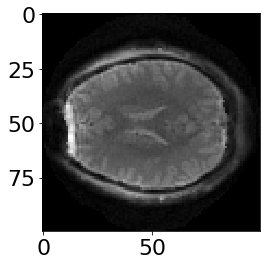

300 100 100


In [38]:
dataset = 'brain'
# dataset = 'invivo_cardiac'
# dataset = 'aperiodic_pincat'

if(dataset is 'brain'):
    real_filepath = '/Users/kgilman/Desktop/t-SVD/real_mri.mat'
    imag_filepath = '/Users/kgilman/Desktop/t-SVD/imag_mri.mat'

    real_data = sio.loadmat(real_filepath)['real_mri']
    imag_data = sio.loadmat(imag_filepath)['imag_mri']

    kdata = real_data + 1j*(imag_data)
    kdata = np.transpose(kdata,(2,0,1))
    orig_im = kspace2im(kdata)
    plt.imshow(orig_im[10,:,:],cmap='gray')
    plt.show()
else:
    if(dataset is 'invivo_cardiac'):
        data = sio.loadmat('/Users/kgilman/Desktop/t-SVD/invivo_perfusion.mat')['x']
    else:
        data = sio.loadmat('/Users/kgilman/Desktop/t-SVD/aperiodic_pincat.mat')['new']
    data = np.transpose(data,(2,0,1))
    n1,n2,n3 = data.shape
    orig_im = np.abs(data)
    ## convert to kspace
    kdata = im2kspace(data)

n1,n2,n3 = kdata.shape
print(n1,n2,n3)

In [39]:
# ## Invivo cardio perfusion data
# vis_idx = 40
# # data = sio.loadmat('/Users/kgilman/Desktop/t-SVD/invivo_perfusion.mat')['x']
# data = sio.loadmat('/Users/kgilman/Desktop/t-SVD/aperiodic_pincat.mat')['new']
# data = np.transpose(data,(2,0,1))
# n1,n2,n3 = data.shape
# orig_im = np.abs(data)

# ## convert to kspace
# kdata = im2kspace(data)

In [40]:
# for i in range(0,n1):
#     plt.imshow(orig_im[i],cmap='gray')
#     plt.title('Original magnitude image')
#     name = '/Users/kgilman/Desktop/' + dataset + '_ims/' + np.str(i) + '.png'
#     plt.savefig(name)
#     plt.show()

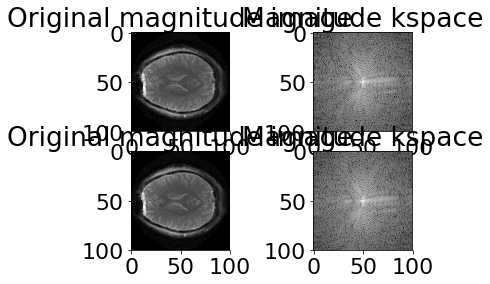

(100, 300, 100)


In [41]:

## Read in the images
vis_idx = 10
# plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(orig_im[vis_idx],cmap='gray')
plt.title('Original magnitude image')

plt.subplot(2,2,2)
test = np.log(np.abs(kdata[vis_idx,:,:]) + 1e-13)
plt.imshow(test,cmap='gray')
plt.title('Magnitude kspace')

vis_idx = 50
plt.subplot(2,2,3)
plt.imshow(orig_im[vis_idx],cmap='gray')
plt.title('Original magnitude image')

plt.subplot(2,2,4)
test = np.log(np.abs(kdata[vis_idx,:,:]) + 1e-13)
plt.imshow(test,cmap='gray')
plt.title('Magnitude kspace')

plt.rcParams.update({'font.size': 22})
name = 'original_and_kspace.eps'
# plt.savefig(name)
plt.show()

### Form the real and imag tensors
kdata_orig = kdata.copy()
kdata = np.transpose(kdata,(1,0,2))

R = np.real(kdata)
Rmean = np.mean(R)

C = np.imag(kdata)
Cmean = np.mean(C)

# R -= Rmean
# C -= Cmean

R = Tensor(R)
C = Tensor(C)

n1,n2,n3 = R.shape()
print(R.shape())

Maximum value of R 342.212487
Minimum value of R -1049.083317


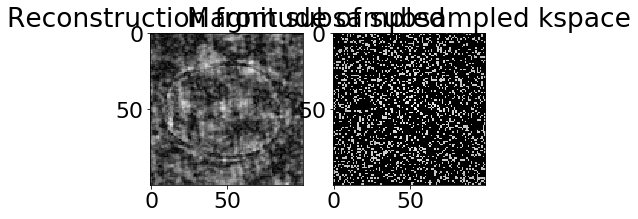

In [42]:
### Generate k-space sampling mask
# tube = True
tube = False

rho = 0.8  # percentage of missing entries
# rho = 0.6
# rho = 0.5
# rho = 0.4  # percentage of missing entries

print('Maximum value of R {:6f}'.format(np.max(R.array())))
print('Minimum value of R {:6f}'.format(np.min(R.array())))

np.random.seed(0)
if(tube is False):
    mask = np.random.rand(n1, n2, n3)
    mask[mask > rho] = 1
    mask[mask <= rho] = 0
    mask = mask.astype(int)
else:
    mask = np.random.rand(n1, n2)
    mask[mask > rho] = 1
    mask[mask <= rho] = 0
    mask = mask.astype(int)
    mask = np.repeat(mask[:, :, np.newaxis], n3, axis=2)

Rfrob = tfrobnorm(R)
Cfrob = tfrobnorm(C)
R_sample = Tensor(R.array() * mask)
C_sample = Tensor(C.array() * mask)

kdata_rec = R_sample.array() + 1j* C_sample.array()
kdata_rec = np.transpose(kdata_rec,(1,0,2))
im_rec = kspace2im(kdata_rec)
# subsampled_im = np.abs(im_rec[vis_idx,:,:])
subsampled_im = np.abs(im_rec)

# plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
plt.imshow(subsampled_im[vis_idx,:,:],cmap='gray')
plt.title('Reconstruction from subsampled')
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs((kdata_rec[vis_idx,:,:])) + 1e-8),cmap='gray')
plt.title('Magnitude of subsampled kspace')
plt.rcParams.update({'font.size': 22})
name = 'subsampled_and_kspace_tube_' + str(tube) + '_' + str(int(rho*100)) + '.eps'
# plt.savefig(name)
plt.show()

In [43]:
print(R_sample.shape())

(100, 300, 100)


Number of Real LR t-SVD Approx Components: 17.000
Number of Complex LR t-SVD Approx Components: 15.000


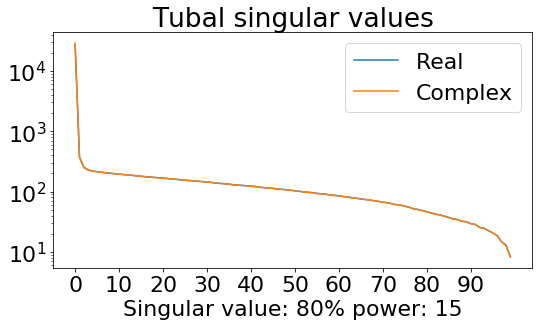

In [44]:
U,S,V = tsvd(R,full=False)
r_svals = np.diag(S.array()[:,:,0])
power80 = 0.8*np.sum(r_svals)
cum_sum = 0
k = 0
for i in range(0,len(r_svals)):
    cum_sum += r_svals[i]
    k += 1
    if(cum_sum > power80):
        break
print('Number of Real LR t-SVD Approx Components: {:.3f}'.format(k))

U,S,V = tsvd(C,full=False)
c_svals = np.diag(S.array()[:,:,0])
power80 = 0.8*np.sum(c_svals)
cum_sum = 0
k = 0
for i in range(0,len(c_svals)):
    cum_sum += c_svals[i]
    k += 1
    if(cum_sum > power80):
        break
print('Number of Complex LR t-SVD Approx Components: {:.3f}'.format(k))


plt.figure(figsize=(8,5),tight_layout=True)
plt.semilogy(np.arange(0,len(r_svals)),r_svals,
        np.arange(0,len(c_svals)),c_svals)
plt.xticks(np.arange(0,len(c_svals),step=10))
plt.legend(['Real','Complex'])
plt.xlabel('Singular value: 80% power: {:d}'.format(k))
plt.title('Tubal singular values')
# name = 'cardiac_tubal_svals.eps'
name = 'brain_tubal_svals.eps'
# plt.savefig(name)
plt.show()

### TNN-ADMM

In [45]:
############################# TNN-ADMM #################################

niter = 150

if(dataset is 'brain'):
    min_iter = 30
else:
    min_iter = 100

fun = lambda X: [0, tfrobnorm(X - R) / Rfrob]
Rhat_tnn, stats, tElapsed_tensor = lrtc(R_sample, mask, rho = 1.1, niter=niter, min_iter = min_iter, it_tol = 1e-4, fun=fun,verbose=True)

fun = lambda X: [0, tfrobnorm(X - C) / Cfrob]
Chat_tnn, stats, tElapsed_tensor = lrtc(C_sample, mask, rho = 1.1, niter=niter, min_iter = min_iter, it_tol = 1e-4,fun=fun,verbose=True)


cost_tensor = stats[:,0]
nrmse_tensor = stats[:,1]
times_tensor = stats[:,2]

print('Time elapsed: Tensor: {:.3f} '.format(tElapsed_tensor))
print('Final R NRMSE: Tensor: {:.8f} '.format(tfrobnorm(Rhat_tnn - R) / Rfrob))
print('Final C NRMSE: Tensor: {:.8f} '.format(tfrobnorm(Chat_tnn - C) / Cfrob))

# plt.subplot(1,2,1)
# plt.semilogy(cost_tensor)
# plt.xlabel('Iteration')
# plt.title('Cost function')
# plt.subplot(1,2,2)
# plt.semilogy(nrmse_tensor)
# plt.xlabel('Iteration')
# plt.title('NRMSE')
# plt.show()

Iter[0]: Cost fxn: 0.000, NRMSE: 1.000000 
Iter[10]: Cost fxn: 0.000, NRMSE: 0.393103 
Iter[20]: Cost fxn: 0.000, NRMSE: 0.337262 
Iter[30]: Cost fxn: 0.000, NRMSE: 0.328478 
Iter[40]: Cost fxn: 0.000, NRMSE: 0.326291 
Iter[0]: Cost fxn: 0.000, NRMSE: 0.993941 
Iter[10]: Cost fxn: 0.000, NRMSE: 0.489566 
Iter[20]: Cost fxn: 0.000, NRMSE: 0.441109 
Iter[30]: Cost fxn: 0.000, NRMSE: 0.430598 
Iter[40]: Cost fxn: 0.000, NRMSE: 0.427328 
Time elapsed: Tensor: 31.049 
Final R NRMSE: Tensor: 0.32596706 
Final C NRMSE: Tensor: 0.42635878 


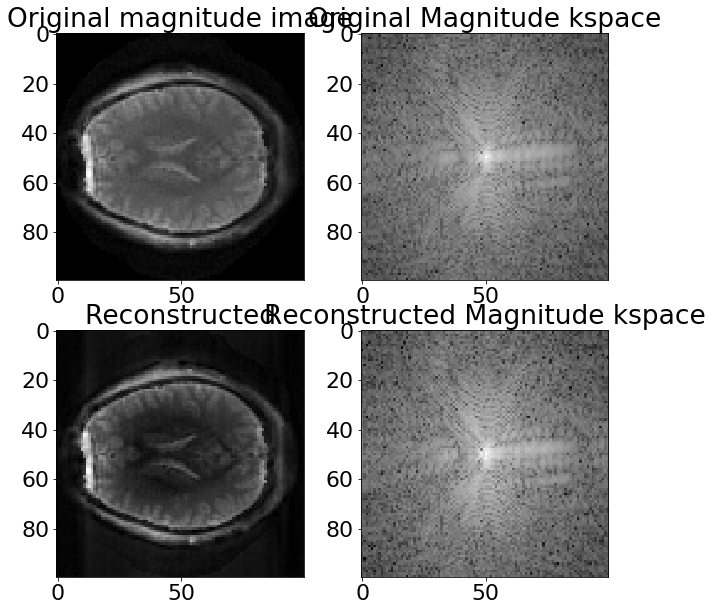

In [46]:
slice_err_tnn, rec_im_tnn, kdata_rec_tnn = compute_stats(Rhat_tnn,Chat_tnn,R,C,orig_im,kdata_orig)

# plt.plot(slice_err_tnn)
# plt.show()

# dir = '/Users/kgilman/Desktop/tnn_cardiac_rec/'
# for i in range(0,n2):
#     name = dir + np.str(i) + '.png'
#     plt.imshow(rec_im_tnn[i,:,:],cmap='gray')
# #     plt.savefig(name)
#     plt.show()
    

### TCTF

In [11]:
#############################################################3
## TCTF
niter = 300
# niter = 100
# rank = 2
rank = 1


min_iter = 30

fun = lambda U,V: [0, tfrobnorm(U*V - R) / Rfrob]
Xtctf,Ztctf, stats_tctf, tElapsed_tctf = tctf(R_sample,mask,rank=rank,niter = niter,min_iter = min_iter,it_tol=1e-4,fun=fun,verbose=True)
Rhat_tctf = Xtctf * Ztctf

fun = lambda U,V: [0, tfrobnorm(U*V - C) / Cfrob]
Xtctf,Ztctf, stats_tctf, _ = tctf(C_sample,mask,rank=rank,niter = niter,min_iter=min_iter,it_tol=1e-4,fun=fun,verbose=True)
Chat_tctf = Xtctf * Ztctf

nrmse_tctf = stats_tctf[:,1]
times_tctf = stats_tctf[:,-1]
print('TCTF Time: {:4f}'.format(tElapsed_tctf))
print('Final R NRMSE: Tensor: {:.8f} '.format(tfrobnorm(Rhat_tctf - R) / Rfrob))
print('Final C NRMSE: Tensor: {:.8f} '.format(tfrobnorm(Chat_tctf - C) / Cfrob))

# plt.semilogy(nrmse_tctf)
# plt.xlabel('Iteration')
# plt.title('NRMSE')
# plt.show()

Iter[1]: NRMSE: 0.819292 
Iter[11]: NRMSE: 0.486900 
Iter[21]: NRMSE: 0.386753 
Iter[31]: NRMSE: 0.329822 
Iter[41]: NRMSE: 0.291429 
Iter[51]: NRMSE: 0.262885 
Iter[61]: NRMSE: 0.240294 
Iter[71]: NRMSE: 0.221588 
Iter[81]: NRMSE: 0.205545 
Iter[91]: NRMSE: 0.191405 
Iter[101]: NRMSE: 0.178685 
Iter[111]: NRMSE: 0.167075 
Iter[121]: NRMSE: 0.156383 
Iter[131]: NRMSE: 0.146495 
Iter[141]: NRMSE: 0.137354 
Iter[151]: NRMSE: 0.128924 


KeyboardInterrupt: 

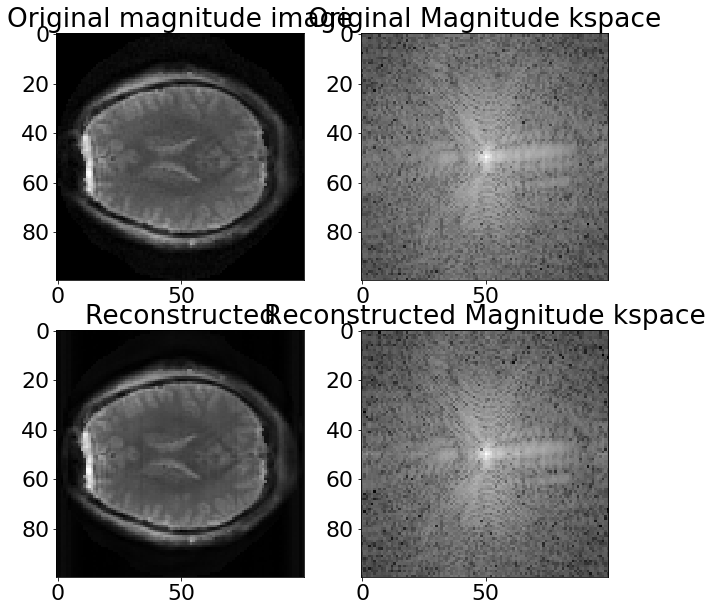

In [59]:
slice_err_tctf, rec_im_tctf, kdata_rec_tctf = compute_stats(Rhat_tctf,Chat_tctf,R,C,orig_im,kdata_orig)

In [60]:
from skimage.measure import compare_ssim
def computeStats(im):
    nrmse = tfrobnorm_array(im - orig_im) / tfrobnorm_array(orig_im)
    scores = []
    for i in range(im.shape[0]):
        (score, diff) = compare_ssim(orig_im[i,:,:] / np.max(orig_im[i,:,:]), im[i,:,:] / np.max(im[i,:,:]), full=True)
        scores.append(score)
    return nrmse,np.mean(scores)
#     print(name + ' NRMSE: {:.5f}'.format(nrmse))
#     print(name + ' SSIM: {:.5f} \n'.format(score))
computeStats(rec_im_tctf)

/Users/kgilman/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


(0.06507637606278958, 0.947392062126775)

### TOUCAN

In [47]:
## TOUCAN
if (dataset is 'brain'):
    rank = 1
else:
    rank = 5
# rank = 5
# rank = 1
outer = 1
# fun = lambda X: [0, tfrobnorm(X - R) / Rfrob]

fun = lambda X,k: [0, tfrobnorm_array(X.array()[:,k,:] - R.array()[:,k,:]) / tfrobnorm_array(R.array()[:,k,:])]

Rhat_toucan, U, stats_toucan, tElapsed_toucan = toucan(R_sample,mask,rank,tube=tube,mode='online',outer=outer,
                                                       fun=fun,cgtol=1e-7,randomOrder=False,verbose=True)

fun = lambda X,k: [0, tfrobnorm_array(X.array()[:,k,:] - C.array()[:,k,:]) / tfrobnorm_array(C.array()[:,k,:])]
Chat_toucan, U, stats_toucan, tElapsed_toucan = toucan(C_sample,mask,rank,tube=tube,mode='online',outer=outer,
                                                       fun=fun,cgtol=1e-7,randomOrder=False,verbose=True)

print('Initial R NRMSE: Tensor: {:.8f} '.format(tfrobnorm(R_sample - R) / Rfrob))
print('Initial C NRMSE: Tensor: {:.8f} '.format(tfrobnorm(C_sample - C) / Cfrob))
print('Final R NRMSE: Tensor: {:.8f} '.format(tfrobnorm(Rhat_toucan - R) / Rfrob))
print('Final C NRMSE: Tensor: {:.8f} '.format(tfrobnorm(Chat_toucan - C) / Cfrob))

Outer[0], Inner[0]: NRMSE: 0.96316736 
Outer[0], Inner[10]: NRMSE: 0.71491690 
Outer[0], Inner[20]: NRMSE: 0.51735054 
Outer[0], Inner[30]: NRMSE: 0.22605883 
Outer[0], Inner[40]: NRMSE: 0.12466164 
Outer[0], Inner[50]: NRMSE: 0.09945535 
Outer[0], Inner[60]: NRMSE: 0.07636779 
Outer[0], Inner[70]: NRMSE: 0.06317600 
Outer[0], Inner[80]: NRMSE: 0.06439870 
Outer[0], Inner[90]: NRMSE: 0.06895583 
Outer[0], Inner[100]: NRMSE: 0.06447279 
Outer[0], Inner[110]: NRMSE: 0.06048765 
Outer[0], Inner[120]: NRMSE: 0.06638934 
Outer[0], Inner[130]: NRMSE: 0.06157337 
Outer[0], Inner[140]: NRMSE: 0.06374949 
Outer[0], Inner[150]: NRMSE: 0.06378171 
Outer[0], Inner[160]: NRMSE: 0.06024269 
Outer[0], Inner[170]: NRMSE: 0.06401945 
Outer[0], Inner[180]: NRMSE: 0.06108989 
Outer[0], Inner[190]: NRMSE: 0.06150325 
Outer[0], Inner[200]: NRMSE: 0.06368550 
Outer[0], Inner[210]: NRMSE: 0.06473890 
Outer[0], Inner[220]: NRMSE: 0.06166170 
Outer[0], Inner[230]: NRMSE: 0.06432551 
Outer[0], Inner[240]: NRMSE

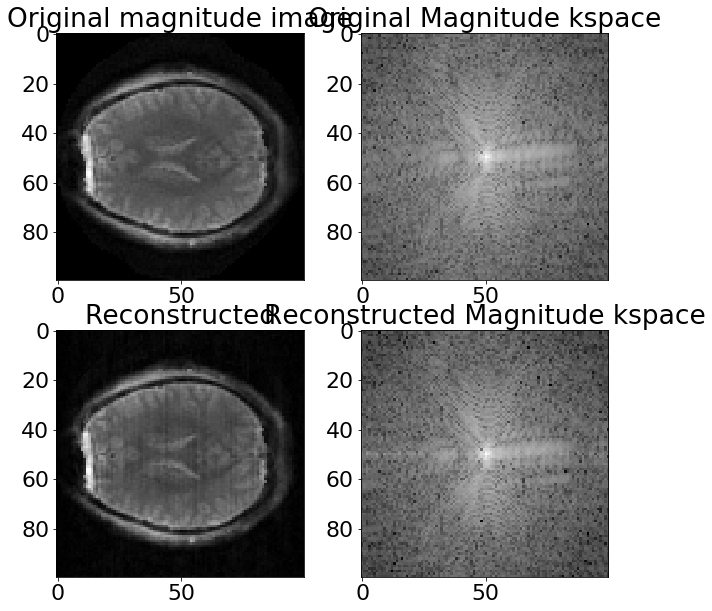

In [48]:
slice_err_toucan, rec_im_toucan, kdata_rec_toucan = compute_stats(Rhat_toucan,Chat_toucan,R,C,orig_im,kdata_orig)
# plt.plot(slice_err_toucan)
# plt.show()

# dir = '/Users/kgilman/Desktop/toucan_cardiac_rec/'
# for i in range(0,n2):
#     name = dir + np.str(i) + '.png'
#     plt.imshow(rec_im_toucan[i,:,:],cmap='gray')
#     plt.savefig(name)
#     plt.show()
    

### STC

In [49]:
from stc import *

#### STC
 
Tensor_R_sample = np.transpose(R_sample.array(),[0,2,1])
Tensor_C_sample = np.transpose(C_sample.array(),[0,2,1])
Mask_Y = np.transpose(mask,[0,2,1])
numcycles = 1
outer = 1
r1 = 25
r2 = 25
r3 = 1

# fun = lambda Lhat,idx: [0, np.linalg.norm(np.transpose(Lhat,[0,2,1]) - R.array()) / Rfrob]
fun = lambda Lhat,idx: [0,1]
Rhat_stc, stats, tElapsed_stc = stc(Tensor_R_sample,Mask_Y,r1,r2,r3,outer,numcycles,fun=fun,verbose=False)

# fun = lambda Lhat,idx: [0, np.linalg.norm(np.transpose(Lhat,[0,2,1]) - C.array()) / Cfrob]

Chat_stc, stats, tElapsed_stc = stc(Tensor_C_sample,Mask_Y,r1,r2,r3,outer,numcycles,fun=fun,verbose=False)

Rhat_stc = Tensor(np.transpose(Rhat_stc,[0,2,1]))
Chat_stc = Tensor(np.transpose(Chat_stc,[0,2,1]))

Rhat_nrmse_stc = tfrobnorm((Rhat_stc) - R) / Rfrob
Chat_nrmse_stc = tfrobnorm((Chat_stc) - C) / Cfrob

print('STC Time: {:4f}'.format(tElapsed_stc))
print('Rhat NRMSE STC: {:6f}'.format(Rhat_nrmse_stc))
print('Chat NRMSE STC: {:6f}'.format(Chat_nrmse_stc))

KeyboardInterrupt: 

In [ ]:
slice_err_stc, rec_im_stc, kdata_rec_stc = compute_stats(Rhat_stc,Chat_stc,R,C,orig_im,kdata_orig)

### OLSTEC

In [61]:
### OLSTEC
from olstec import *
rank = 50

Tensor_R_sample = np.transpose(R.array(),[0,2,1])
Tensor_C_sample = np.transpose(C.array(),[0,2,1])
Mask_Y = np.transpose(mask,[0,2,1])

tensor_dims = [n1,n3,n2]
maxepochs = 1
tolcost = 1e-14
permute_on = False

if (dataset is 'brain'):
    options = {
    'maxepochs': maxepochs,
    'tolcost': tolcost,
    'lam': 0.8,
    'mu': 0.001,
    'permute_on':  permute_on,
    'store_subinfo': True,
    'store_matrix': False,
    'verbose': False,
    'tw_flag': None,
    'tw_len': None
    }
else:
    options = {
        'maxepochs': maxepochs,
        'tolcost': tolcost,
        'lam': 0.5,
        'mu': 0.0001,
        'permute_on': permute_on,
        'store_subinfo': True,
        'store_matrix': False,
        'verbose': False,
        'tw_flag': None,
        'tw_len': None
    }
    
Xinit = {
    'A': np.random.randn(tensor_dims[0], rank),
    'B': np.random.randn(tensor_dims[1], rank),
    'C': np.random.randn(tensor_dims[2], rank)
}

print(Tensor_R_sample.shape)

Xsol_olstec, Rhat_olstec, info_olstec, sub_infos_olstec = OLSTEC(Tensor_R_sample, Mask_Y, None, tensor_dims, rank,
                                                          Xinit, options)
Xsol_olstec, Chat_olstec, info_olstec, sub_infos_olstec = OLSTEC(Tensor_C_sample, Mask_Y, None, tensor_dims, rank,
                                                          Xinit, options)
    
Rhat_olstec = Tensor(np.transpose(Rhat_olstec,[0,2,1]))
Chat_olstec = Tensor(np.transpose(Chat_olstec,[0,2,1]))

print(Rhat_olstec.shape)

Rhat_nrmse_olstec = tfrobnorm(Rhat_olstec - R) / Rfrob
Chat_nrmse_olstec = tfrobnorm(Chat_olstec - C) / Cfrob
tElapsed_olstec = np.sum(sub_infos_olstec['times'])

print('OLSTEC Time: {:4f}'.format(tElapsed_olstec))
print('Rhat NRMSE OLSTEC: {:6f}'.format(Rhat_nrmse_olstec))
print('Chat NRMSE OLSTEC: {:6f}'.format(Chat_nrmse_olstec))

(100, 100, 300)
<bound method Tensor.shape of <tsvd.Tensor object at 0x125ba8748>>
OLSTEC Time: 47.052632
Rhat NRMSE OLSTEC: 0.354789
Chat NRMSE OLSTEC: 0.474351


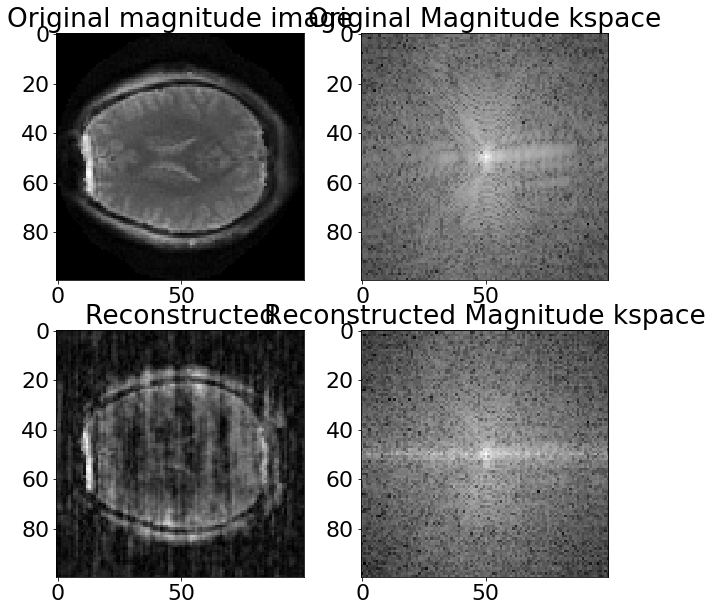

In [62]:
slice_err_olstec, rec_im_olstec, kdata_rec_olstec = compute_stats(Rhat_olstec,Chat_olstec,R,C,orig_im,kdata_orig)

# plt.plot(slice_err_olstec)
# plt.show()

# dir = '/Users/kgilman/Desktop/olstec_cardiac_rec/'
# for i in range(0,n2):
#     name = dir + np.str(i) + '.png'
#     plt.imshow(rec_im_olstec[i,:,:],cmap='gray')
#     plt.savefig(name)
#     plt.show()
    

### TeCPSGD

In [57]:
from tecpsgd import *
rank = 50
tensor_dims = [n1,n3,n2]
maxepochs = 1
tolcost = 1e-14
permute_on = False

if (dataset is 'brain'):
    options = {
    'maxepochs': maxepochs,
    'tolcost': tolcost,
    'lam': 0.001,
    'stepsize': 0.01,
    'permute_on':  permute_on,
    'store_subinfo': True,
    'store_matrix': False,
    'verbose': False
    }

else:
    options = {
        'maxepochs': maxepochs,
        'tolcost': tolcost,
        'lam': 0.0001,
        'stepsize': 100000,
        'permute_on': permute_on,
        'store_subinfo': True,
        'store_matrix': False,
        'verbose': False
    }


# Xinit = {
#     'A': np.random.randn(tensor_dims[0], rank),
#     'B': np.random.randn(tensor_dims[1], rank),
#     'C': np.random.randn(tensor_dims[2], rank)
# }

Xsol_TeCPSGD, Rhat_tecpsgd, info_TeCPSGD, sub_infos_TeCPSGD = TeCPSGD(Tensor_R_sample, Mask_Y, None, tensor_dims, rank,
                                                          Xinit, options)

Xsol_TeCPSGD, Chat_tecpsgd, info_TeCPSGD, sub_infos_TeCPSGD = TeCPSGD(Tensor_C_sample, Mask_Y, None, tensor_dims, rank,
                                                          Xinit, options)


Rhat_tecpsgd = Tensor(np.transpose(Rhat_tecpsgd,[0,2,1]))
Chat_tecpsgd = Tensor(np.transpose(Chat_tecpsgd,[0,2,1]))

Rhat_nrmse_tecpsgd = tfrobnorm(Rhat_tecpsgd - R) / Rfrob
Chat_nrmse_tecpsgd = tfrobnorm(Chat_tecpsgd - C) / Cfrob

print('Rhat NRMSE OLSTEC: {:6f}'.format(Rhat_nrmse_tecpsgd))
print('Chat NRMSE OLSTEC: {:6f}'.format(Chat_nrmse_tecpsgd))
tElapsed_tecpsgd = np.sum(sub_infos_TeCPSGD['times'])

Rhat NRMSE OLSTEC: 0.222575
Chat NRMSE OLSTEC: 0.212372


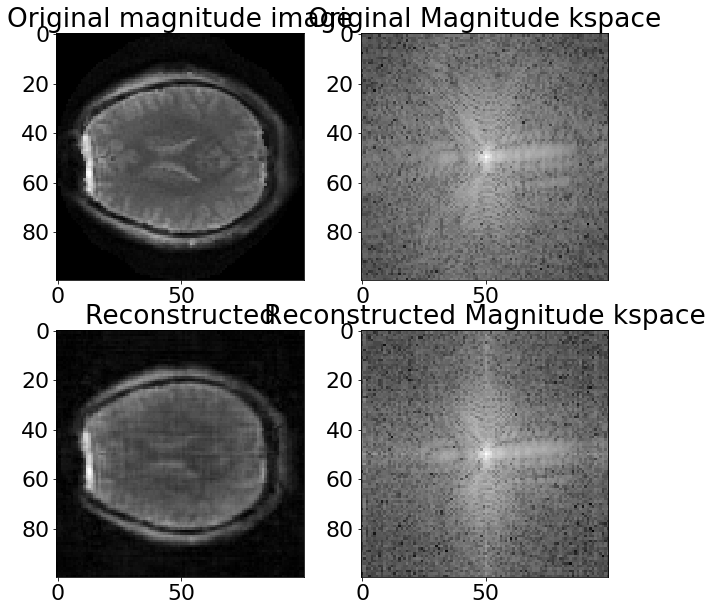

In [58]:
slice_err_tecpsgd, rec_im_tecpsgd, kdata_rec_tecpsgd = compute_stats(Rhat_tecpsgd,Chat_tecpsgd,R,C,orig_im,kdata_orig)
# plt.plot(slice_err_tecpsgd)
# plt.show()

# dir = '/Users/kgilman/Desktop/tecpsgd_cardiac_rec/'
# for i in range(0,n2):
#     name = dir + np.str(i) + '.png'
#     plt.imshow(rec_im_tecpsgd[i,:,:],cmap='gray')
#     plt.savefig(name)
#     plt.show()

In [ ]:
name = '/Users/kgilman/Desktop/mri_results/frame_53_reconstruction.png'

plt.figure(figsize=(10,10),tight_layout=True)
plt.subplot(1,3,1)
plt.imshow(rec_im_toucan[53,:,:],cmap='gray')
plt.title('TOUCAN')
plt.subplot(1,3,2)
plt.imshow(rec_im_olstec[53,:,:],cmap='gray')
plt.title('OLSTEC')
plt.subplot(1,3,3)
plt.imshow(rec_im_tecpsgd[53,:,:],cmap='gray')
plt.title('TeCPSGD')
# plt.savefig(name)
plt.show()

GROUSE Time: 0.085121
GROUSE NRMSE: 0.119442


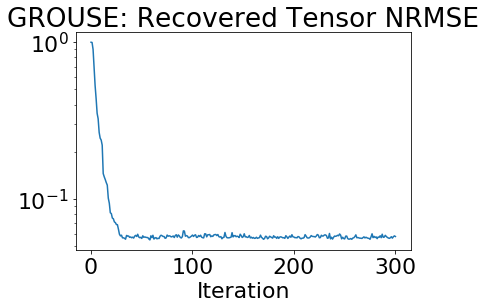

In [87]:
R_m = lr_flatten(R.array())
mask_m = lr_flatten(mask)

Ry_m = R_m * mask_m

rank = 1
fun = lambda X,k: [0, np.linalg.norm(X - R_m[:,k]) / np.linalg.norm(R_m[:,k])]
Ym_hat_grouse, stats_grouse, tElapsed_grouse = grouse(Ry_m, mask_m, rank,outer=1,mode="online",fun=fun,randomOrder=False,
                                                      verbose=False)
grouse_nrmse = np.linalg.norm(Ym_hat_grouse - R_m,'fro') / np.linalg.norm(R_m,'fro')
print('GROUSE Time: {:4f}'.format(tElapsed_grouse))
print('GROUSE NRMSE: {:4f}'.format(grouse_nrmse))
        
nrmse_grouse = stats_grouse[:,1]
times_grouse = stats_grouse[:,-1]
tElapsed_grouse = np.sum(times_grouse)
plt.semilogy(nrmse_grouse)
plt.title('GROUSE: Recovered Tensor NRMSE')
plt.xlabel('Iteration')
plt.show()


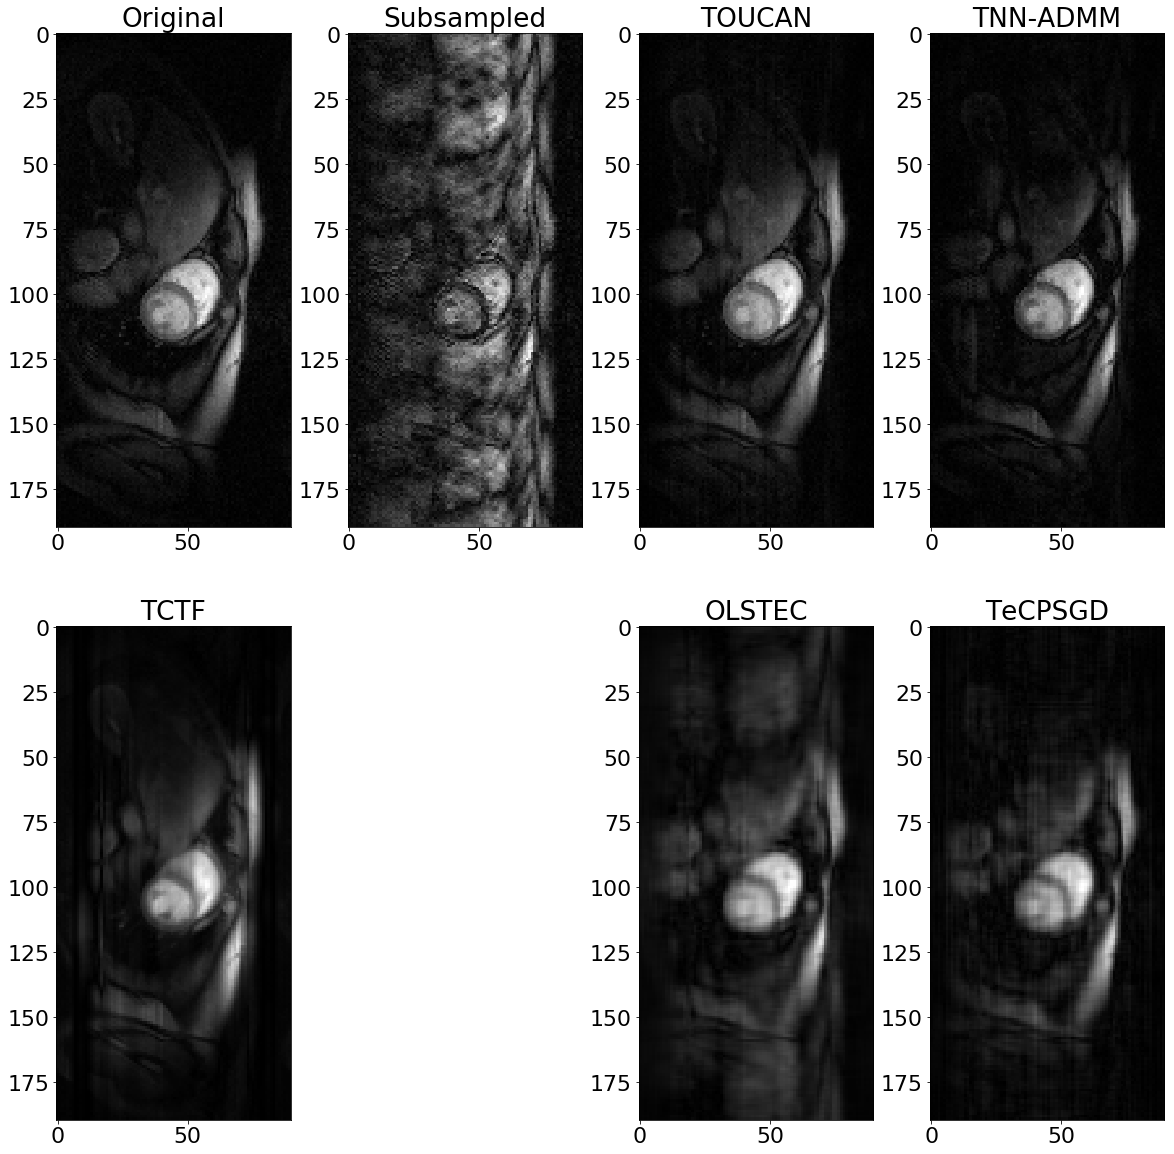

In [21]:
from skimage.measure import compare_ssim

def computeStats(im):
    nrmse = tfrobnorm_array(im - orig_im) / tfrobnorm_array(orig_im)
    scores = []
    for i in range(im.shape[0]):
        (score, diff) = compare_ssim(orig_im[i,:,:] / np.max(orig_im[i,:,:]), im[i,:,:] / np.max(im[i,:,:]), full=True)
        scores.append(score)
    return nrmse,np.mean(scores)
#     print(name + ' NRMSE: {:.5f}'.format(nrmse))
#     print(name + ' SSIM: {:.5f} \n'.format(score))

vis_idx = 39
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.imshow(orig_im[vis_idx,:,:],cmap='gray')
# plt.title('Original: NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(orig_im)))
plt.title('Original')

plt.subplot(2,4,2)
plt.imshow(subsampled_im[vis_idx,:,:],cmap='gray')
# plt.title('Subsampled: NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(subsampled_im)))
plt.title('Subsampled')

plt.subplot(2,4,3)
plt.imshow(rec_im_toucan[vis_idx,:,:],cmap='gray')
# plt.title('TOUCAN: NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(toucan_rec_im)))
plt.title('TOUCAN')

plt.subplot(2,4,4)
plt.imshow(rec_im_tnn[vis_idx,:,:],cmap='gray')
# plt.title('TNN-ADMM: NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(tnn_rec_im)))
plt.title('TNN-ADMM')

plt.subplot(2,4,5)
plt.imshow(rec_im_tctf[vis_idx,:,:],cmap='gray')
# plt.title('TCTF NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(tctf_rec_im)))
plt.title('TCTF')

# plt.subplot(2,4,6)
# plt.imshow(stc_rec_im[vis_idx,:,:],cmap='gray')
# # plt.title('STC NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(stc_rec_im)))
# plt.title('STC')

plt.subplot(2,4,7)
plt.imshow(rec_im_olstec[vis_idx,:,:],cmap='gray')
# plt.title('STC NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(stc_rec_im)))
plt.title('OLSTEC')

plt.subplot(2,4,8)
plt.imshow(rec_im_tecpsgd[vis_idx,:,:],cmap='gray')
# plt.title('STC NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(stc_rec_im)))
plt.title('TeCPSGD')

plt.rcParams.update({'font.size': 22})
name = 'tensor_mri_reconstruct_' + dataset + '_tube' + str(tube) + '_' + str(int(rho*100)) + '.eps'
# plt.savefig(name)
plt.show()


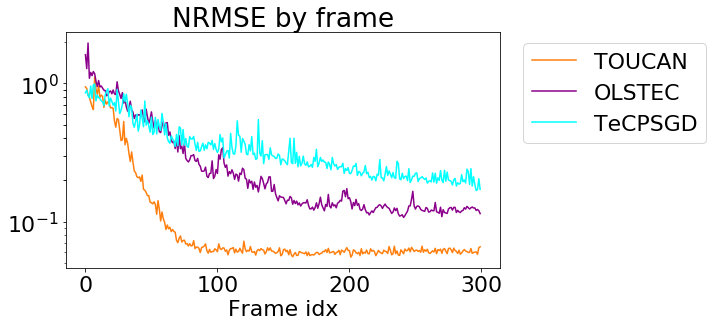

In [55]:
fig, ax = plt.subplots(figsize=(12, 5),tight_layout=True)
# plt.semilogy(np.arange(0,len(slice_err_tnn)),slice_err_tnn,'r',label='TNN-ADMM')
plt.semilogy(np.arange(0, len(slice_err_toucan)), slice_err_toucan, '#ff7f0e', label='TOUCAN')
# plt.semilogy(np.arange(0,len(slice_err_tctf)),slice_err_tctf,'k',label='TCTF')
# plt.semilogy(np.arange(0,len(slice_err_stc)),slice_err_stc,'#FF007F',label='STC')
plt.semilogy(np.arange(0, len(slice_err_olstec)), slice_err_olstec, '#8B008B',label='OLSTEC')
plt.semilogy(np.arange(0, len(slice_err_tecpsgd)), slice_err_tecpsgd,'#00FFFF',label='TeCPSGD')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.title('NRMSE by frame')
plt.xlabel('Frame idx')
plt.yticks(np.arange(1e-1, 1.1, step=0.1))
# name = 'tensor_mri_reconstruct_cardiac_tube_' + str(tube) + '_' + str(int(rho*100)) + '_frameNRMSE.eps'
# name = '/Users/kgilman/Desktop/mri_results/tensor_mri_reconstruct_brain_tube_' + str(tube) + '_' + str(int(rho * 100)) + '_frameNRMSE.eps'
name = '/Users/kgilman/Desktop/t-SVD/mri_reconstruct/mri_results/tensor_mri_reconstruct_' + dataset + '_tube_' + str(tube) + \
       '_' + str(int(rho * 100)) + '_frameNRMSE.eps'
# plt.savefig(name)
plt.show()

In [23]:
### Print computation times
filename = 'times_' + dataset + '_tube_' + str(tube) + '_' + str(int(rho*100)) + '.text'
# filename = 'times_cardiac_tube_' + str(tube) + '_' + str(int(rho*100)) + '.text'
print('TNN ADMM: {:.3f} '.format(tElapsed_tensor),file=open(filename, "a"))
print('TCTF: {:4f}'.format(tElapsed_tctf),file=open(filename, "a"))
print('TOUCAN: {:4f}'.format(tElapsed_toucan),file=open(filename, "a"))
# print('STC: {:4f}'.format(tElapsed_stc),file=open(filename, "a"))
print('OLSTEC: {:4f}'.format(tElapsed_olstec),file=open(filename, "a"))
print('TeCPSGD: {:4f}'.format(tElapsed_tecpsgd),file=open(filename, "a"))

In [24]:
filename = 'stats_' + dataset + '_tube_' + str(tube) + '_' + str(int(rho*100)) + '.text'

print('Original: NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(orig_im)),file=open(filename, "a"))
print('Subsampled: NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(subsampled_im)),file=open(filename, "a"))
print('TOUCAN: NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(rec_im_toucan)),file=open(filename, "a"))
print('TNN-ADMM: NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(rec_im_tnn)),file=open(filename, "a"))
print('TCTF NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(rec_im_tctf)),file=open(filename,"a"))
# print('STC NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(stc_rec_im)),file=open(filename,"a"))
print('OLSTEC NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(rec_im_olstec)),file=open(filename,"a"))
print('TeCPSGD NRMSE: {:5f}, SSIM {:5f}'.format(*computeStats(rec_im_tecpsgd)),file=open(filename,"a"))

/Users/kgilman/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  import sys
